把BPNN代码代入论文附录zhong

In [75]:
# 1.1导入数据集（把日期删除）
import pandas as pd
data=pd.read_excel(r"10keras_data.xlsx",sheet_name=0)#
data.head()

#单独抽取未归一化的订单量，方便之后使用
y_noguiyigua=data["order"]
# 1.2数据预处理，这里只归一化
data=(data-data.min())/(data.max()-data.min())
data.head()

# 1.3数据集拆分为训练集和测试集(强调下特征是输入x，订单是输出y)，比例9比1
x=data.drop("order",axis=1)
x.shape[1]
y=data["order"]#比例9：1，
x_train,x_test=x[:int(len(data)*0.9)],x[int(len(data)*0.9):]
y_train,y_test=y[:int(len(data)*0.9)],y[int(len(data)*0.9):]

# 2.1导入keras并创建时序model
from keras.utils import np_utils  
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential()

import time


# 2.2构建BPNN架构：神经网络层数，每层神经元个数，激活函数为relu
# 2.2.1一层隐藏层
model.add(Dense(6,input_dim=x.shape[1],activation='relu',))#第一个隐藏层
# 2.2.2输出层
model.add(Dense(1,activation='relu'))
print(model.summary())

# 2.3train model，loss function与优化器（optimizer）设置
#最后的accuracy适合分类，accuracy=预测分类的准确率
model.compile(loss='mse', optimizer='adam')


# 2.4 test model
train_starttime=time.time()
history=model.fit(x_train,y_train,epochs=1000, batch_size=1,validation_data=(x_test,y_test.values) )
print("start time:",time.time()-train_starttime)

#输出测试成本，权重与阈值w与b
#batch_size=1可省略
test_cost=model.evaluate(x_test,y_test,batch_size=1)
print('test cost:', test_cost)

W,b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)
print(W.shape,b.shape)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 7         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
None
Train on 31 samples, validate on 4 samples
Epoch 1/1000
31/31 [==============================] - 1s 22ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 2/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 3/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 4/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 5/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 

Epoch 76/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 77/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 78/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 79/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 80/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 81/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 82/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 83/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 84/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 85/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_los

31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 237/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 238/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 239/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 240/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 241/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 242/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 243/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 244/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 245/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.

31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 397/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 398/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 399/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 400/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 401/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 402/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 403/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 404/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 405/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.

31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 557/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 558/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 559/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 560/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 561/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 562/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 563/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 564/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 565/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.

31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 717/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 718/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 719/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 720/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 721/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 722/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 723/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 724/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 725/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.

31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 877/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 878/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 879/1000
31/31 [==============================] - 0s 3ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 880/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 881/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 882/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 883/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 884/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.1420
Epoch 885/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.

In [76]:
y_predict = model.predict(x_test)

y_predict_fanguiyihua=y_predict*(y_noguiyigua.max()-y_noguiyigua.min())+y_noguiyigua.min()

print(y_predict_fanguiyihua)

[[ 7500.]
 [ 7500.]
 [ 7500.]
 [ 7500.]]



from keras.utils import plot_model
plot_model(model, to_file='model.png')


In [77]:
# 3 可视化
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

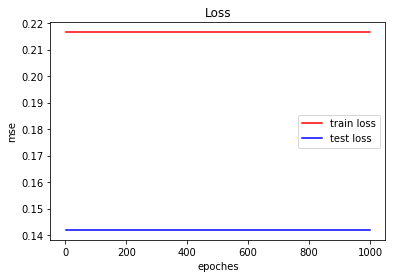

In [78]:
#3.1可视化1；折线图，x轴为epoches，y轴为train_cost与test_cost
#如果目标函数是mse，可画这个图，但是这里目标函数是mape
index=[]
for i in range(len(history.history['loss'])):
    index_value=i+1
    index.append(index_value)

plt.plot(index,history.history['loss'],'r')
plt.plot(index,history.history['val_loss'],'b')

plt.title('Loss')
plt.ylabel('mse')
plt.xlabel('epoches')
plt.legend(["train loss","test loss"])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 7         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


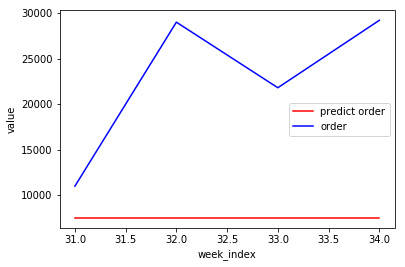

In [79]:
# 3.2可视化2：x轴为对应的预测周，y轴为预测值与对应的实际值

#预测值的反归一化，已知训练集的反归一化
y_predict = model.predict(x_test)

y_predict_fanguiyihua=y_predict*(y_noguiyigua.max()-y_noguiyigua.min())+y_noguiyigua.min()
y_test_fanguiyihua=y_test*(y_noguiyigua.max()-y_noguiyigua.min())+y_noguiyigua.min()


y_pre=np.concatenate([y_train,y_predict.flatten()])
plt.plot(range(y_train.shape[0],y_pre.shape[0]), y_predict_fanguiyihua,'r')
plt.plot(range(y_train.shape[0],y_pre.shape[0]),y_test_fanguiyihua,'b')

plt.xlabel("week_index")
plt.ylabel("value")
plt.legend(["predict order","order"])

#ps:看下model架构
model.summary()

In [80]:
#参数窗口跳出，代表程序跑完
model.fit?